In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from json import load
from pathlib import Path
from pprint import pprint

from mba_tcc.utils.config import get_env_var_as_path

In [2]:
results_path = get_env_var_as_path("PATH_DATA_FINAL_TRAINING")

In [3]:
json_list = list(
    map(
        lambda x: load(x.open()),
        map(
            lambda x: x / "params.json",
            sorted(results_path.iterdir())
        )
    )
)

In [40]:
df = pd.DataFrame(json_list).drop(columns=["file_name", "file_path"])

In [62]:
df["anomaly_set_anomaly_pct"] = df["anomaly_set_anomaly_counts"] * 100 / df["row_count"]
df["notanomaly_set_anomaly_pct"] = df["notanomaly_set_anomaly_counts"] * 100 / df["row_count"]
df["has_window"] = (~pd.isnull(df.anomaly_set_best_window_size)).astype("int")

In [63]:
df

,anomaly_index_end,anomaly_index_start,anomaly_set_anomaly_counts,anomaly_set_best_window_size,anomaly_set_zscore_max,anomaly_set_zscore_min,file_number,mnemonic,notanomaly_set_anomaly_counts,notanomaly_set_zscore_max,notanomaly_set_zscore_min,row_count,running_time_in_seconds,training_index_end,anomaly_set_anomaly_pct,notanomaly_set_anomaly_pct,has_window
0,52620,52000,466,3.0,56.507227,-122.808555,1,DISTORTED1sddb40,52280,575.499220,-289.072284,79795,0.008973,35000,0.583996,65.517890,1
1,56900,56600,128,3.0,189.659108,-8.728051,2,DISTORTED2sddb40,52471,577.520265,-284.720308,80001,0.006546,35000,0.159998,65.587930,1
2,46900,46600,288,3.0,134.479667,-152.717603,3,DISTORTED3sddb40,52592,570.834295,-287.811618,80000,0.010159,35000,0.360000,65.740000,1
3,5600,5400,201,3.0,4079.850200,-1819.974000,4,DISTORTEDBIDMC1,10756,4273.043367,-2500.119667,11000,0.003701,2500,1.827273,97.781818,1
4,5392,5391,1,3.0,2.722031,-4.989909,5,DISTORTEDCIMIS44AirTemperature1,284,5.816979,-5.893226,8184,0.002990,4000,0.012219,3.470186,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,271070,270800,242,3.0,274.666667,-195.999967,246,tilt12755mtable,253783,4268.000000,-4001.333333,299867,0.018159,100211,0.080702,84.631853,1
246,121980,121900,78,3.0,94.666667,-40.000033,247,tilt12755mtable,168870,4268.000000,-3944.000000,200000,0.013822,50211,0.039000,84.435000,1
247,4707,4702,0,NaN,3.000000,-3.000000,248,weallwalk,0,NaN,NaN,8432,7.430929,2000,0.000000,0.000000,0
248,8315,8285,0,NaN,3.000000,-3.000000,249,weallwalk,0,NaN,NaN,10524,10.165040,2753,0.000000,0.000000,0


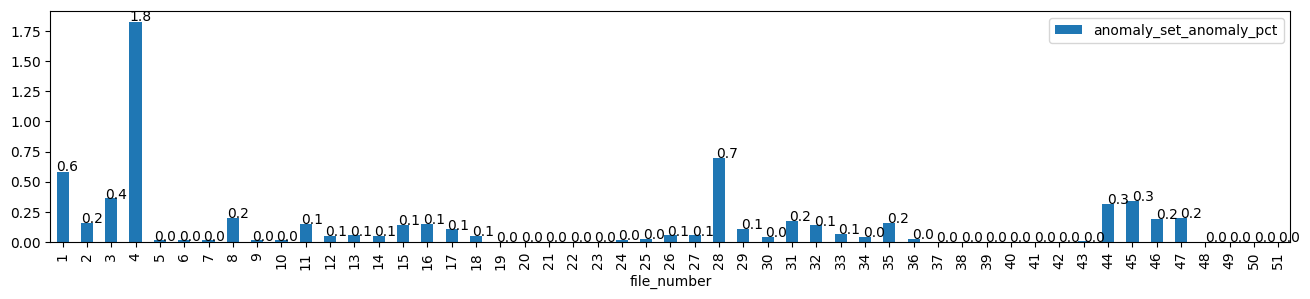

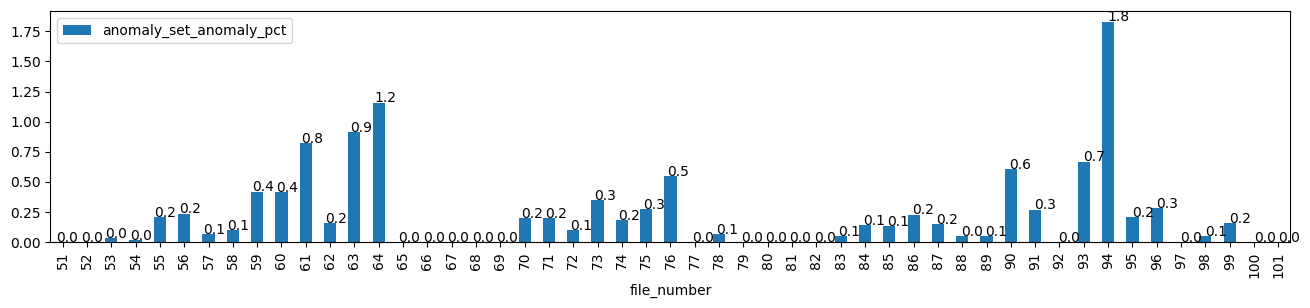

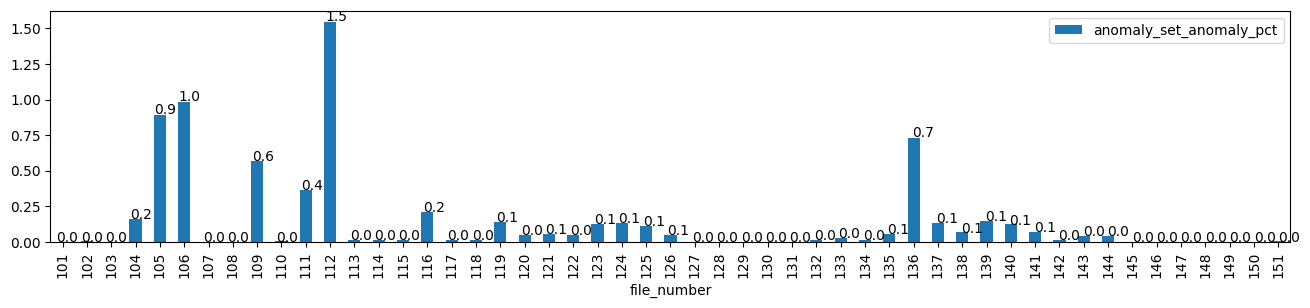

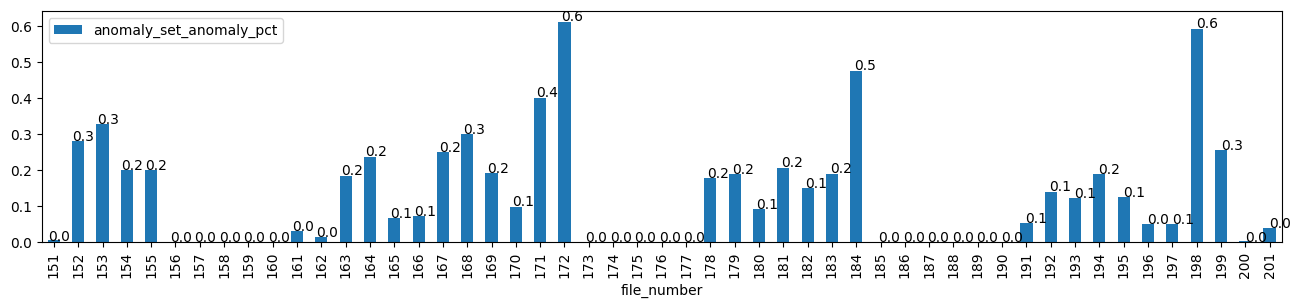

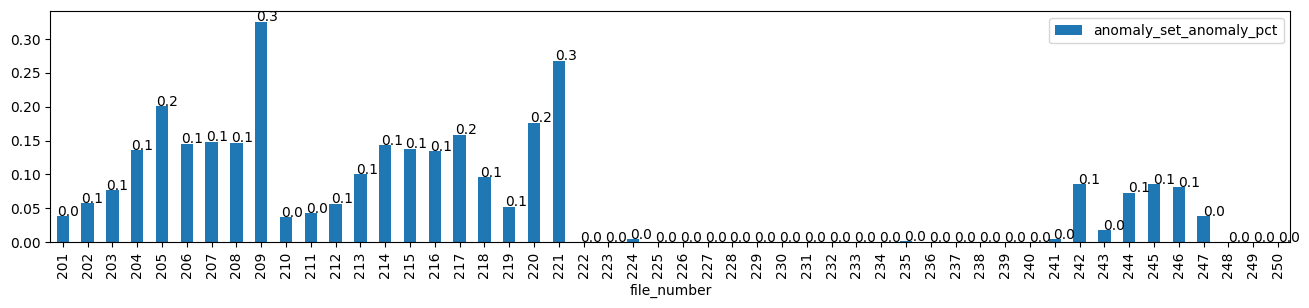

In [66]:
for b in range(0, 250, 50):
    ax = df.loc[b: b+50].plot.bar(x="file_number", y="anomaly_set_anomaly_pct", figsize=(16, 3))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() * 1.005, p.get_height() * 1.005))

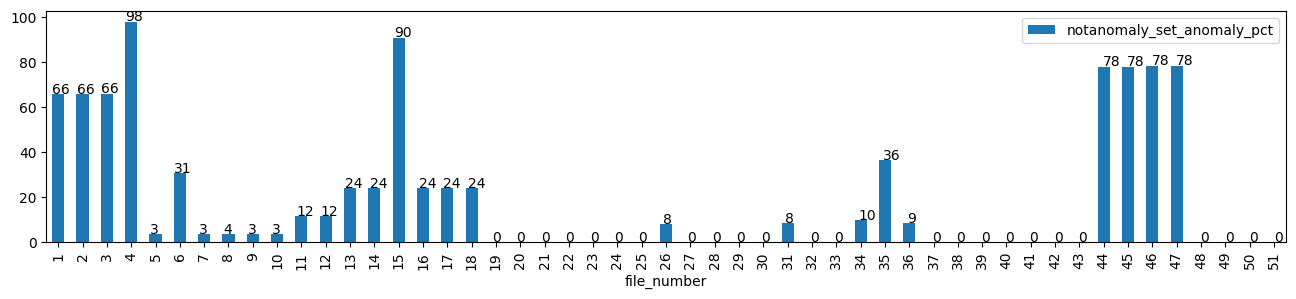

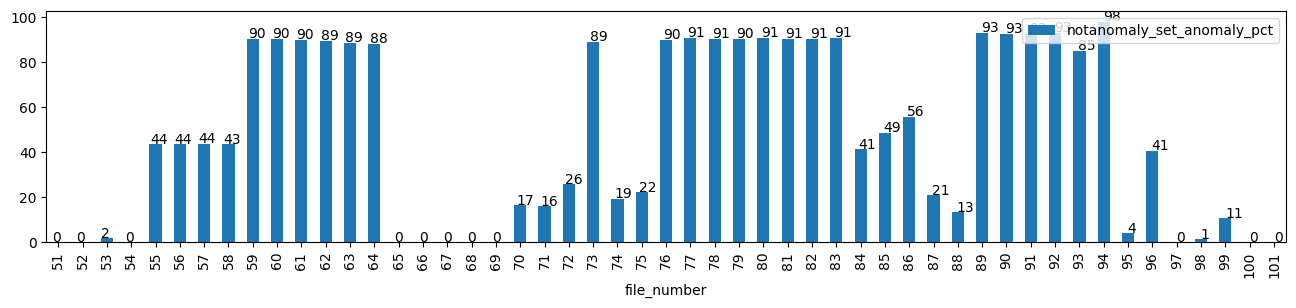

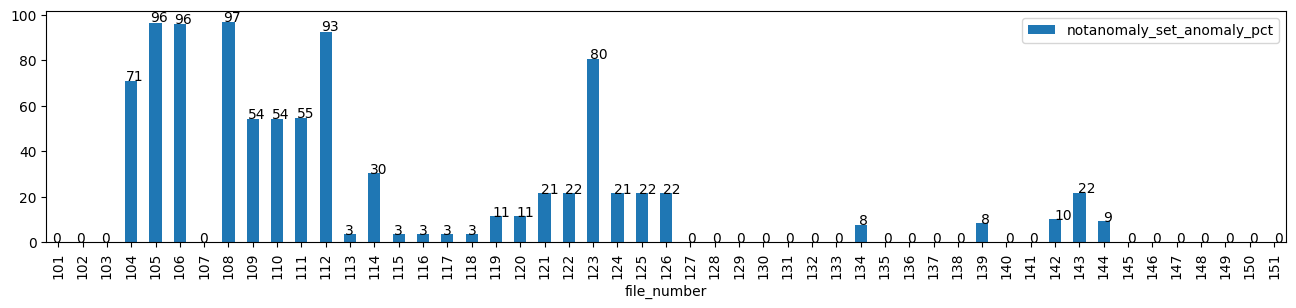

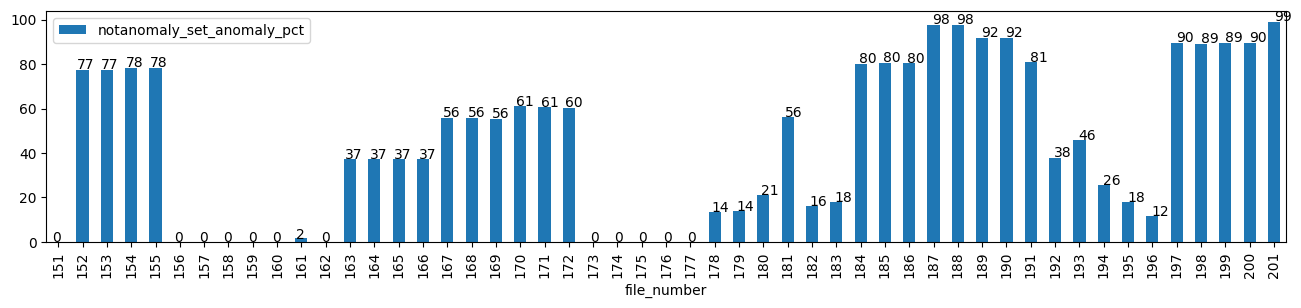

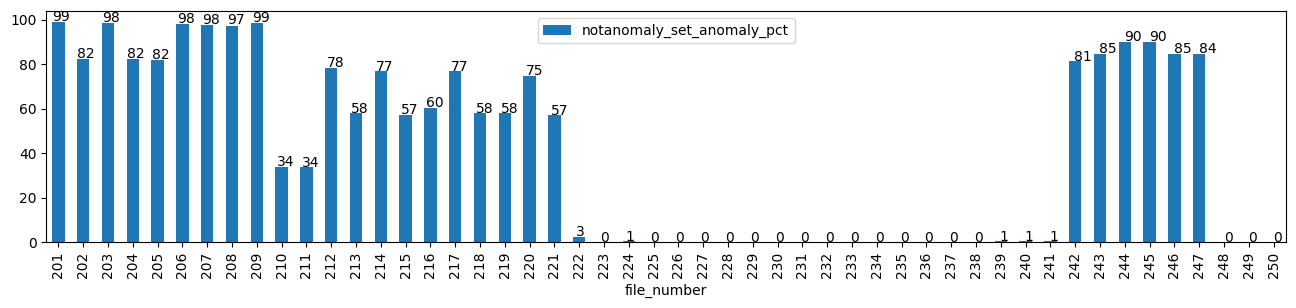

In [67]:
for b in range(0, 250, 50):
    ax = df.loc[b: b+50].plot.bar(x="file_number", y="notanomaly_set_anomaly_pct", figsize=(16, 3))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0f}", (p.get_x() * 1.005, p.get_height() * 1.005))